In [274]:
from hashlib import sha1
import random
import string
import numpy as np
import pandas as pd

def randomword(length):
   letters = string.ascii_lowercase
   return ''.join(random.choice(letters) for i in range(length))

In [275]:
# numBits must be multiple of 4 in this case
def preImageAttack(numBits):
    assert(numBits % 4 == 0)
    myString = randomword(10)
    target = random.getrandbits(numBits)
    nonce = 0
    while True:
        testString = myString + str(nonce)
        result = int(sha1(testString.encode()).hexdigest()[-int(numBits/4):], 16)
        if result == target:
            return nonce + 1
        else:
            nonce += 1


In [276]:
tries_8bit = []
for i in range(50):
    tries_8bit.append(preImageAttack(8))
    
print(tries_8bit)

tries_12bit = []
for i in range(50):
    tries_12bit.append(preImageAttack(12))
    
print(tries_12bit)

tries_16bit = []
for i in range(50):
    tries_16bit.append(preImageAttack(16))
    
print(tries_16bit)

tries_20bit = []
for i in range(50):
    tries_20bit.append(preImageAttack(20))
    
print(tries_20bit)

[353, 306, 302, 82, 44, 25, 3, 102, 19, 322, 714, 73, 500, 7, 41, 445, 264, 106, 73, 344, 337, 469, 922, 115, 1101, 333, 172, 41, 57, 149, 55, 131, 165, 243, 689, 9, 135, 368, 190, 110, 61, 868, 246, 221, 440, 194, 191, 33, 244, 215]
[948, 2104, 3712, 7031, 35, 7002, 170, 4427, 8700, 1712, 5360, 239, 566, 5870, 2553, 4368, 1238, 9047, 1366, 4780, 4048, 5146, 1779, 7758, 2613, 9395, 1282, 743, 4072, 3035, 5265, 1769, 841, 3618, 4685, 6678, 821, 5434, 4325, 6073, 18773, 4090, 811, 1726, 8175, 4611, 1867, 293, 1642, 8692]
[115502, 40642, 121230, 13551, 4233, 64034, 23809, 196620, 120097, 91680, 116445, 26341, 13567, 191417, 46502, 40947, 10754, 994, 21275, 3458, 39747, 11307, 12779, 53040, 44288, 130263, 27928, 81597, 4242, 3680, 36677, 91842, 65434, 641, 34832, 108958, 89043, 3742, 74458, 199929, 73857, 84229, 16078, 7247, 26764, 52300, 32222, 23241, 232892, 70044]
[1614695, 208459, 99275, 1416484, 201643, 2737620, 438721, 1323882, 645293, 1806114, 230895, 2335006, 482023, 1873994, 48260

In [277]:
# numBits must be multiple of 4 in this case
def collisionAttack(numBits):
    assert(numBits % 4 == 0)
    myString = randomword(10)
    firstTarget = int(sha1(myString.encode()).hexdigest()[-int(numBits/4):], 16)
    found = {firstTarget}
    nonce = 0
    while True:
        testString = myString + str(nonce)
        result = int(sha1(testString.encode()).hexdigest()[-int(numBits/4):], 16)
        if result in found:
            return nonce + 1
        else:
            found.add(result)
            nonce += 1

In [278]:
tries_8bit2 = []
for i in range(50):
    tries_8bit2.append(collisionAttack(8))
    
print(tries_8bit2)

tries_12bit2 = []
for i in range(50):
    tries_12bit2.append(collisionAttack(12))
    
print(tries_12bit2)

tries_16bit2 = []
for i in range(50):
    tries_16bit2.append(collisionAttack(16))
    
print(tries_16bit2)

tries_20bit2 = []
for i in range(50):
    tries_20bit2.append(collisionAttack(20))
    
print(tries_20bit2)

[41, 32, 43, 34, 16, 6, 13, 25, 26, 30, 27, 32, 15, 18, 14, 15, 2, 25, 11, 13, 8, 18, 31, 25, 20, 14, 10, 37, 30, 9, 4, 14, 19, 16, 36, 34, 9, 15, 9, 19, 36, 14, 16, 5, 30, 22, 30, 19, 16, 26]
[66, 79, 74, 30, 63, 50, 32, 78, 85, 84, 217, 21, 72, 144, 118, 30, 65, 73, 114, 109, 57, 81, 168, 96, 74, 178, 39, 110, 65, 131, 53, 45, 86, 182, 23, 24, 91, 80, 121, 13, 45, 112, 72, 66, 55, 134, 78, 103, 125, 52]
[144, 335, 124, 557, 376, 238, 322, 117, 180, 347, 249, 142, 227, 113, 556, 562, 242, 160, 187, 272, 298, 241, 67, 548, 382, 291, 459, 383, 205, 317, 579, 248, 221, 340, 171, 410, 331, 309, 479, 399, 265, 64, 279, 146, 406, 206, 619, 230, 203, 471]
[721, 1627, 786, 946, 2217, 1208, 1112, 292, 311, 618, 1138, 975, 1633, 634, 1640, 1194, 1120, 825, 1477, 414, 1757, 1235, 77, 1769, 1043, 507, 1062, 737, 1148, 1002, 1993, 1051, 1974, 1811, 1577, 722, 873, 1335, 918, 333, 1931, 572, 716, 1185, 965, 578, 1227, 1063, 2753, 1481]


In [288]:
variance = pd.DataFrame(tries_8bit, columns=["Pre-Image 8-bit"])
variance["Pre-Image 12-bit"] = tries_12bit
variance["Pre-Image 16-bit"] = tries_16bit
variance["Pre-Image 20-bit"] = tries_20bit
variance["Collision 8-bit"] = tries_8bit2
variance["Collision 12-bit"] = tries_12bit2
variance["Collision 16-bit"] = tries_16bit2
variance["Collision 20-bit"] = tries_20bit2
variance

,Pre-Image 8-bit,Pre-Image 12-bit,Pre-Image 16-bit,Pre-Image 20-bit,Collision 8-bit,Collision 12-bit,Collision 16-bit,Collision 20-bit
0,353,948,115502,1614695,41,66,144,721
1,306,2104,40642,208459,32,79,335,1627
2,302,3712,121230,99275,43,74,124,786
3,82,7031,13551,1416484,34,30,557,946
4,44,35,4233,201643,16,63,376,2217
5,25,7002,64034,2737620,6,50,238,1208
6,3,170,23809,438721,13,32,322,1112
7,102,4427,196620,1323882,25,78,117,292
8,19,8700,120097,645293,26,85,180,311
9,322,1712,91680,1806114,30,84,347,618


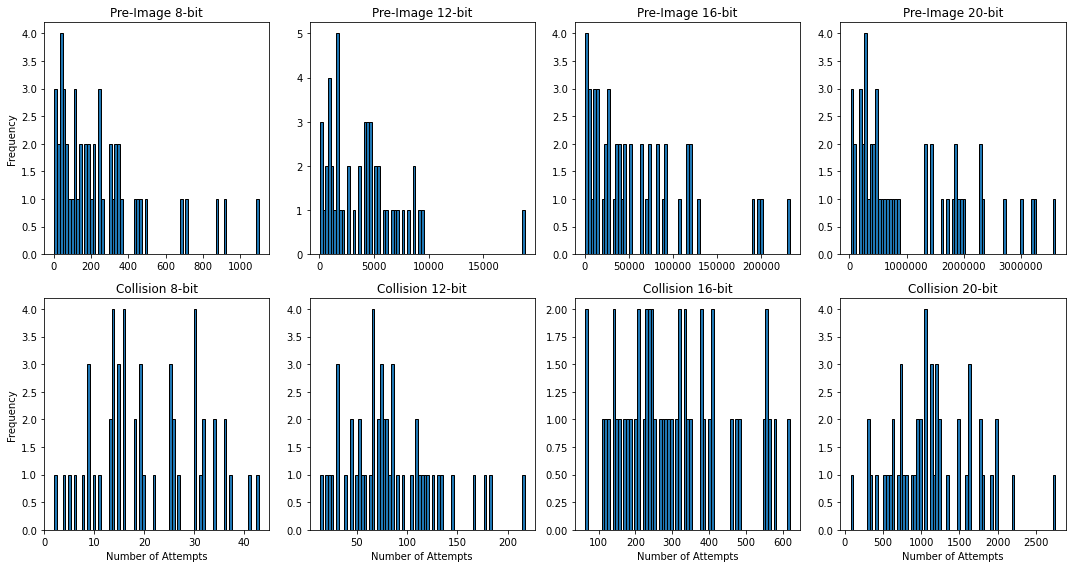

In [371]:
cols = variance.columns
f, axes = plt.subplots(2, 4)
f.set_figheight(8)
f.set_figwidth(15)

axes[0][0].hist(variance[cols[0]], bins=75, ec='black')
axes[0][0].set_title(cols[0])
axes[0][1].hist(variance[cols[1]], bins=75, ec='black')
axes[0][1].set_title(cols[1])
axes[0][2].hist(variance[cols[2]], bins=75, ec='black')
axes[0][2].set_title(cols[2])
axes[0][3].hist(variance[cols[3]], bins=75, ec='black')
axes[0][3].set_title(cols[3])
axes[0][3].ticklabel_format(style='plain')

axes[1][0].hist(variance[cols[4]], bins=75, ec='black')
axes[1][0].set_title(cols[4])
axes[1][1].hist(variance[cols[5]], bins=75, ec='black')
axes[1][1].set_title(cols[5])
axes[1][2].hist(variance[cols[6]], bins=75, ec='black')
axes[1][2].set_title(cols[6])
axes[1][3].hist(variance[cols[7]], bins=75, ec='black')
axes[1][3].set_title(cols[7])

axes[0][0].set_ylabel('Frequency')
axes[1][0].set_ylabel('Frequency')
axes[1][0].set_xlabel('Number of Attempts')
axes[1][1].set_xlabel('Number of Attempts')
axes[1][2].set_xlabel('Number of Attempts')
axes[1][3].set_xlabel('Number of Attempts')

plt.tight_layout()
plt.savefig('variance.png')

In [366]:
variance.describe()

,Pre-Image 8-bit,Pre-Image 12-bit,Pre-Image 16-bit,Pre-Image 20-bit,Collision 8-bit,Collision 12-bit,Collision 16-bit,Collision 20-bit
count,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00
mean,252.58,4025.76,59927.98,1089778.50,20.58,83.26,300.34,1125.66
std,248.00,3415.81,57267.79,988885.16,10.34,44.36,142.53,547.85
min,3.00,35.00,641.00,20155.00,2.00,13.00,64.00,77.00
25%,73.00,1435.00,14194.75,294669.00,14.00,53.50,203.50,725.75
50%,190.50,3880.00,40794.50,640677.00,18.50,76.00,275.50,1062.50
75%,336.00,5415.50,87839.50,1848571.50,30.00,109.75,382.75,1480.00
max,1101.00,18773.00,232892.00,3606882.00,43.00,217.00,619.00,2753.00


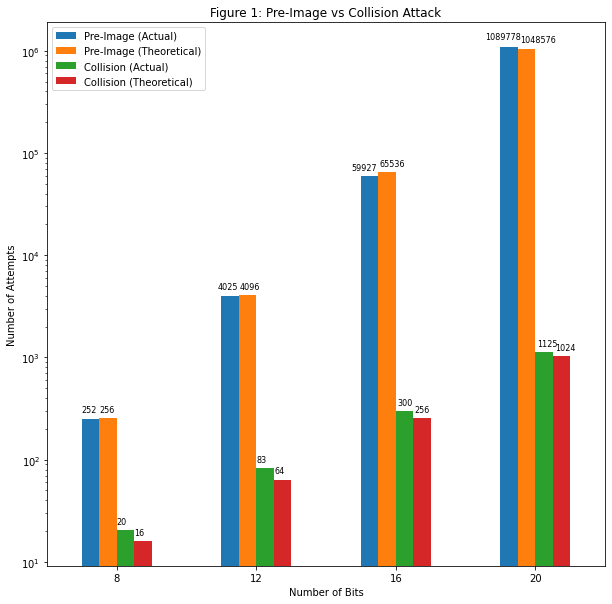

In [367]:
df = pd.DataFrame(preImageAvg, columns=["Pre-Image (Actual)"], index=["8","12","16","20"])
df["Pre-Image (Theoretical)"] = [2**8, 2**12, 2**16, 2**20]
df["Collision (Actual)"] = collisionAvg
df["Collision (Theoretical)"] = [2**4, 2**6, 2**8, 2**10]


ax = df.plot(kind='bar', logy=True, figsize=(10,10), rot=0, title="Figure 1: Pre-Image vs Collision Attack")

# p = ax.patches[0]
# ax.annotate(int(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.15))
# q = ax.patches[2]
# ax.annotate(int(q.get_height()), (q.get_x() * 1.005, q.get_height() * 1.15))

for p in ax.patches:
    if p != ax.patches[1] and p != ax.patches[2] and p!= ax.patches[3]:
        ax.annotate(int(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.15), fontsize=8)
    
p = ax.patches[1]    
ax.annotate(int(p.get_height()), (p.get_x()*0.96, p.get_height() * 1.15), fontsize=8 )
p = ax.patches[2]    
ax.annotate(int(p.get_height()), (p.get_x()*0.96, p.get_height() * 1.15), fontsize=8)
p = ax.patches[3]
ax.annotate(int(p.get_height()), (p.get_x()*0.96, p.get_height() * 1.2), fontsize=8)

ax.set_xlabel("Number of Bits")
ax.set_ylabel("Number of Attempts")

fig = ax.get_figure()
fig.savefig('mean.png')